In [129]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Question 1: Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

To load all the stock tickers we first have to store the all_stocks_2006-01-01_to_2018-01-01.csv file and then store all the stock symbols in a dataframe which is named as tickersymbol. After storing the stock symbols in another dataframe we need to run a for loop which will iterate through all_stocks file and store the stocks tickers for each ticker symbol.

This for loop checks if the next index has the same stock symbol and if the stock symbol is the same then it will append the index in the list. As soon as the next stock symbol changes the loop will create a pandas DataFrame upto the index that is appended in the list. Furthermore it will empty the list, allowing it to append the index of the next stock tickers.

I have also made a use of exec() function to store the dynamic variables as stock symbols.


In [130]:
            
#Reading the all_stocks CSV file and also creating dataframe for tickersymbol from that

all_stocks = pd.read_csv("C:/Users/User/Documents/Programming for DataScience\MidTermExam-1/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv", header = 0)
all_stocks


tickersymbol = all_stocks.ix[:,"Name"]
tickersymbol

all_stocks.index


        




C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


RangeIndex(start=0, stop=93612, step=1)

In [131]:
#iterating a for loop to store dynamic tickersymbol variables and creating a dataframe for each tickersymbol variable
        
x =[]
k = 0
for i in tickersymbol:
    if k < 93611:   
        if tickersymbol[k] == tickersymbol[k+1]:
            x.append(k)
            k = k + 1
        
        elif tickersymbol[k] != tickersymbol[k+1]:
            variablename = tickersymbol[k]
            exec(variablename + "= pd.DataFrame(data = all_stocks, index = x)")
            x = []
            k = k +1
            x.append(k)
            
    else:
        x.append(k) 
        variablename = tickersymbol[k]
        exec(variablename + "= pd.DataFrame(data = all_stocks, index = x)")

# Question 2: Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.


In this Question we are asked to perform exploratory analysis. Thus the first task if to model the data. So First I have made changes to the dataframes that I am going to use in this dataset that is all_stocks and MMM. I have used split function to partition the date and made columns for Year, Month and Date Seperate, which would help us a lot in generating data analysis by for different time intervals.

Next I have checked for Null Values and filled those with the mean of respective Stock ticker. 

For Carrying exploratory analysis I have performed multiple analysis operations on MMM stock ticker. First I have generated heat maps for Stock information on "Volume" and "Open" which directly shows that as the value of the stock increaes, the volume of stocks trading decreases. 

Then I have carreid analysis on MMM stock ticker for two time intervals i.e 2006:2011 - 2012:2017 for "Open"

And lastly I have also compared the volume of stocks for different intervals of time.

In [142]:
#Partitioning Date to Year, Month and Date
MMM = MMM.join(MMM["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
MMM = MMM.join(MMM["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))

In [143]:
MMM.drop("Month-Day", axis = 1, inplace = True)
MMM.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month,Day
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,01,03
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,01,04
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,01,05
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,01,06
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,01,09


In [144]:
#Partitioning Date to Year, Month and Date

all_stocks = all_stocks.join(all_stocks["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
all_stocks = all_stocks.join(all_stocks["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))

In [145]:
all_stocks.drop("Month-Day", axis = 1, inplace = True)
all_stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month,Day
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,01,03
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,01,04
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,01,05
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,01,06
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,01,09


In [146]:
all_stocks.describe()

,Open,High,Low,Close,Volume
count,93612.000000,93612.000000,93612.000000,93612.000000,9.361200e+04
mean,85.619683,86.384695,84.834705,85.641753,2.015667e+07
std,108.138885,108.951034,107.215133,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.495000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [141]:
#Code to Find all the Null Values

all_stocks[all_stocks.isnull().any(axis=1)]
   

,Date,Open,High,Low,Close,Volume,Name


In [140]:
#Filling the Missing data for Open via using Groupby

all_stocks["Open"] = all_stocks.groupby("Name")["Open"].apply(lambda x: x.fillna(x.mean()))
all_stocks["Open"] = all_stocks["Open"].fillna(all_stocks.mean())

In [136]:
#Filling the Missing data for High via using Groupby

all_stocks["High"] = all_stocks.groupby("Name")["High"].apply(lambda x: x.fillna(x.mean()))
all_stocks["High"] = all_stocks["High"].fillna(all_stocks.mean())


In [137]:
#Filling the Missing data for Low via using Groupby

all_stocks["Low"] = all_stocks.groupby("Name")["Low"].apply(lambda x: x.fillna(x.mean()))
all_stocks["Low"] = all_stocks["Low"].fillna(all_stocks.mean())


In [147]:
MMM_Open = MMM.pivot_table(values = "Open", index = "Month", columns ="Year")
MMM_Open

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,,,
01,76.366000,78.131500,78.367143,56.114500,83.202632,87.854500,84.928500,97.557143,135.226667,162.504500,142.097368,177.547500
02,72.711579,75.441579,79.783500,49.477368,79.910526,90.304211,87.622000,102.547368,130.431579,166.318421,154.067500,180.192632
03,74.495652,75.402273,78.324500,46.585000,81.739565,91.408261,88.122273,105.156000,133.010952,165.257727,162.233636,190.643478
04,81.320000,77.531500,79.901364,53.399524,85.240000,93.710500,87.462500,105.895909,136.138095,163.189048,167.603810,191.460000
05,85.342273,85.716818,77.317143,58.025500,83.836500,94.849524,86.197727,109.563182,141.000952,160.403000,168.055238,197.601818
06,80.945455,86.889048,74.591905,59.366818,78.653182,91.899545,85.996667,110.254000,143.714762,157.920909,169.540000,209.410909
07,73.052500,89.420000,69.695909,63.688182,82.732381,94.471000,89.122857,114.088182,144.737727,154.116364,178.486000,208.568947
08,70.163043,87.727826,71.704762,71.710476,83.660909,81.419565,92.246087,116.180000,142.330952,146.422857,179.270870,205.210435
09,73.056500,90.587895,69.849048,73.507619,84.691905,77.795238,92.668421,118.461500,144.309524,140.713333,177.709048,208.644500


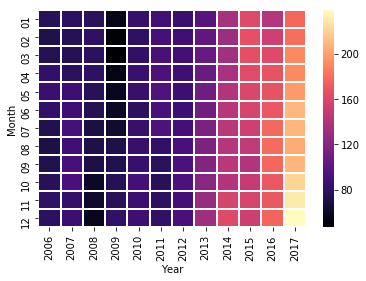

In [148]:
sns.heatmap(MMM_Open, cmap="magma", linecolor = "white", linewidth =1)

In [149]:
MMM_Volume = MMM.pivot_table(values = "Volume", index = "Month", columns ="Year")


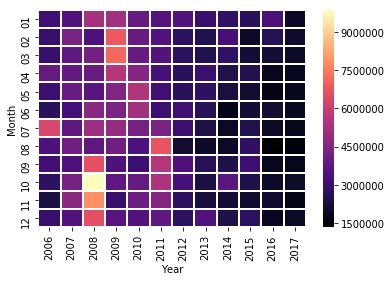

In [150]:
sns.heatmap(MMM_Volume, cmap="magma", linecolor = "white", linewidth =1)

In [151]:
MMM["Date"] = pd.to_datetime(MMM["Date"])
MMM_YearIndex = MMM.set_index("Date")

MMM_YearIndex


,Open,High,Low,Close,Volume,Name,Year,Month,Day
Date,,,,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,01,03
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,01,04
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,01,05
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,01,06
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,01,09
2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM,2006,01,10
2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM,2006,01,11
2006-01-12,78.20,78.23,77.20,77.70,2121100,MMM,2006,01,12
2006-01-13,76.95,78.20,76.95,77.50,1925300,MMM,2006,01,13


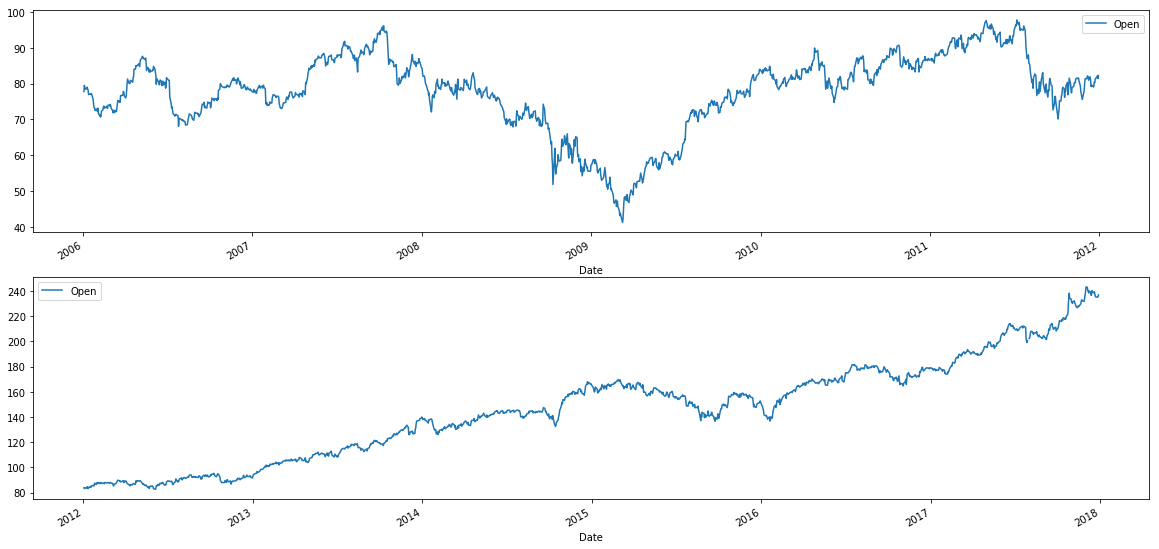

In [152]:

figure = plt.figure
plt.subplot(2,1,1)

MMMUpto2011 = MMM_YearIndex["2006" : "2011"]
MMMUpto2011.Open.plot(legend = True,figsize = (20,10))

plt.subplot(2,1,2)
MMMFrom2012 = MMM_YearIndex["2012" : "2017"]
MMMFrom2012.Open.plot(legend = True, figsize = (20,10))

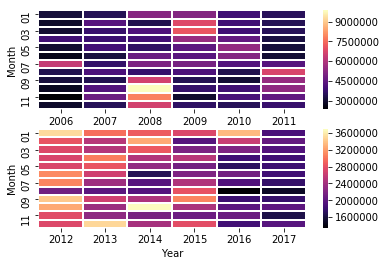

In [153]:
figure = plt.figure

plt.subplot(2,1,1)
MMMUpto2011Pivot = MMMUpto2011.pivot_table(values = "Volume", index = "Month", columns ="Year")
MMMUpto2011Pivot
sns.heatmap(MMMUpto2011Pivot, cmap="magma", linecolor = "white", linewidth =1)

plt.subplot(2,1,2)
MMMFrom2012Pivot = MMMFrom2012.pivot_table(values = "Volume", index = "Month", columns ="Year")
MMMFrom2012Pivot
sns.heatmap(MMMFrom2012Pivot, cmap="magma", linecolor = "white", linewidth =1)

# Question 3: You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

First I am showing the descriptive details of two stocks GOOGL and AABA where I am displaying count, mean, standard deviation, minimum value, maximum value and many more. After that I am carring out the moving average of both the stocks and compaing it with each other for "Open". 

At the last step I am visualizing the min, max and average of these two stocks and comparing it with eachother.

In [154]:
GOOGL.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,427.921232,431.557380,423.850918,427.767231,3.555464e+06
std,236.076807,237.272149,234.677361,236.099794,3.043297e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.735000,250.145000,243.910000,247.435000,1.761274e+06
50%,310.340000,312.780000,307.720000,310.010000,2.518762e+06
75%,571.830000,575.930000,565.505000,570.645000,4.249708e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [155]:
AABA.describe()

,Open,High,Low,Close,Volume
count,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03
mean,28.430209,28.770656,28.070109,28.416864,2.158479e+07
std,13.256631,13.356402,13.156594,13.257918,1.925918e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.177500,16.387500,15.970000,16.130000,1.248078e+07
50%,27.180000,27.490000,26.825000,27.105000,1.732337e+07
75%,36.660000,37.052500,36.310000,36.640000,2.512361e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


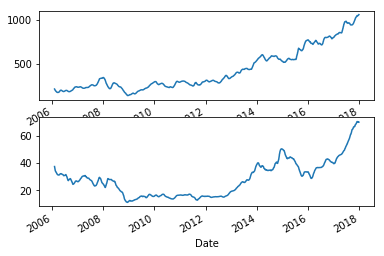

In [156]:
GOOGL["Date"] = pd.to_datetime(GOOGL["Date"])
GOOGL = GOOGL.set_index("Date")
AABA["Date"] = pd.to_datetime(AABA["Date"])
AABA = AABA.set_index("Date")

figure = plt.figure
plt.subplot(2,1,1)
GOOGL["Open"].rolling(window = 25).mean().plot()
GOOGL = GOOGL.reset_index()

plt.subplot(2,1,2)
AABA["Open"].rolling(window = 25).mean().plot()
AABA = AABA.reset_index()

In [157]:
print("CAT Details")
print(CAT.describe())

print("\n\nMMMdetails")
print(MMM.describe())

CAT Details
              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3020.000000  3.020000e+03
mean     80.446698    81.270977    79.535194    80.447142  7.048104e+06
std      20.878821    20.873631    20.884551    20.902803  4.216069e+06
min      22.650000    23.290000    21.710000    22.170000  1.775920e+05
25%      68.430000    69.195000    67.585000    68.437500  4.463115e+06
50%      81.820000    82.580000    80.760000    81.745000  6.029723e+06
75%      93.640000    94.455000    92.800000    93.510000  8.464417e+06
max     157.940000   158.650000   157.230000   158.420000  6.780610e+07


MMMdetails
              Open         High          Low        Close        Volume
count  3018.000000  3019.000000  3018.000000  3019.000000  3.019000e+03
mean    111.735268   112.574429   110.945152   111.820934  3.342994e+06
std      44.379404    44.516487    44.298202    44.444221  1.901346e+06
min      41.310000    42.450000    40.8

In [158]:
CAT = CAT.join(CAT["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
CAT = CAT.join(CAT["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))
CAT.drop("Month-Day", axis = 1, inplace = True)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


[]

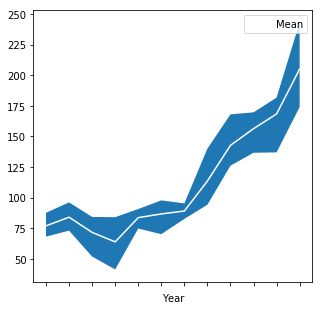

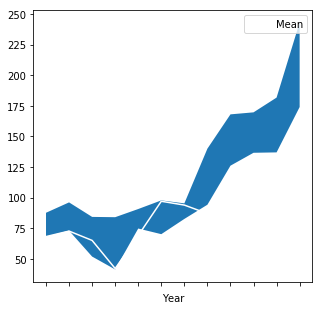

In [159]:
MMMDA = MMM.groupby('Year')['Open'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
MMMDA.reset_index(inplace=True)
MMMPlot  = MMMDA.plot(x='Year', y='Mean', c='white', figsize = (5,5))
plt.fill_between(x='Year',y1='Low Value',y2='High Value', data=MMMDA)

CATDA = CAT.groupby('Year')['Open'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
CATDA.reset_index(inplace=True)

CATPlot  = CATDA.plot(x='Year', y='Mean', c='white', figsize = (5,5))
plt.fill_between(x='Year',y1='Low Value',y2='High Value', data=MMMDA)
plt.plot()

# Question 4: Take five stocks of your choice and create the same type of report stated in question 3.

In this question I generated similar analysis of the stocks like we did in Question 3. It is just we compoared five different stocks and analyzed their mean, max, minimum and other different descriptive analysis.

First we generated general properties for CVX, BA, CAT, GOOGL and CSCO using describe(). Then I visualized them their minimum, maximum and mean of individual stocks.

At the end we also compared rolling average for each of the 5 individual stocks.

In [160]:
print("CVX Details")
print(CVX.describe())

print("\n\nBA Details")
print(BA.describe())

print("\n\nCAT Details")
print(CAT.describe())

print("\n\nGOOGL Details")
print(GOOGL.describe())

print("\n\nCSCO Details")
print(CSCO.describe())

CVX Details
              Open         High          Low        Close        Volume
count  3019.000000  3020.000000  3019.000000  3020.000000  3.020000e+03
mean     94.565952    95.422050    93.694949    94.603364  8.979709e+06
std      19.441811    19.373339    19.485274    19.429177  4.273217e+06
min      54.150000    54.600000    53.760000    54.080000  3.021970e+05
25%      77.730000    78.500000    77.005000    77.725000  5.957944e+06
50%      97.870000    98.830000    96.790000    97.785000  8.014747e+06
75%     109.580000   110.317500   108.790000   109.572500  1.095294e+07
max     134.580000   135.100000   133.690000   134.850000  4.821415e+07


BA Details
              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3020.000000  3.020000e+03
mean    101.408168   102.292700   100.426595   101.441540  5.068818e+06
std      47.280221    47.483406    47.055732    47.353584  2.759523e+06
min      29.220000    30.020000    29.0

In [161]:
CVX = CVX.join(CVX["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
CVX = CVX.join(CVX["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))
CVX.drop("Month-Day", axis = 1, inplace = True)

CSCO = CSCO.join(CSCO["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
CSCO = CSCO.join(CSCO["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))
CSCO.drop("Month-Day", axis = 1, inplace = True)

BA = BA.join(BA["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
BA = BA.join(BA["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))
BA.drop("Month-Day", axis = 1, inplace = True)

GOOGL = GOOGL.join(GOOGL["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
GOOGL = GOOGL.join(GOOGL["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))
GOOGL.drop("Month-Day", axis = 1, inplace = True)

CAT = CAT.join(CAT["Date"].str.split("-",1, expand = True).rename(columns = {0: "Year", 1: "Month-Day"}))
CAT = CAT.join(CAT["Month-Day"].str.split("-",1, expand = True).rename(columns = {0: "Month", 1: "Day"}))
CAT.drop("Month-Day", axis = 1, inplace = True)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


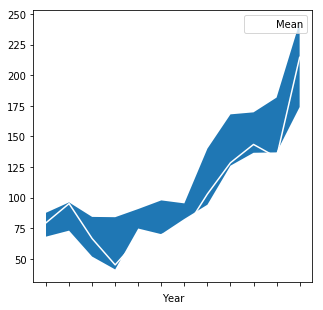

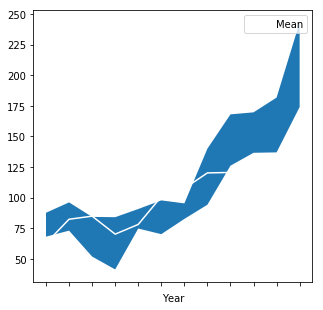

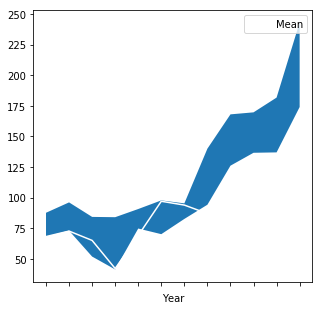

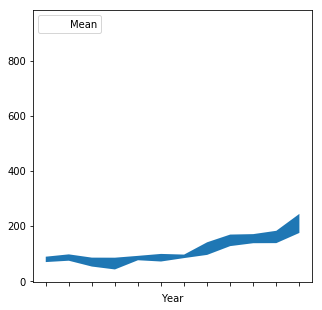

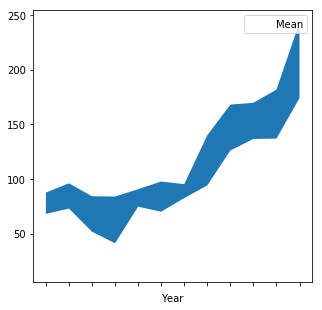

In [123]:
BADA = BA.groupby('Year')['Open'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
BADA.reset_index(inplace=True)
BAPlot  = BADA.plot(x='Year', y='Mean', c='white', figsize = (5,5))
plt.fill_between(x='Year',y1='Low Value',y2='High Value', data=MMMDA)

CVXDA = CVX.groupby('Year')['Open'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
CVXDA.reset_index(inplace=True)
CVXPlot  = CVXDA.plot(x='Year', y='Mean', c='white', figsize = (5,5))
plt.fill_between(x='Year',y1='Low Value',y2='High Value', data=MMMDA)

CATDA = CAT.groupby('Year')['Open'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
CATDA.reset_index(inplace=True)
CATPlot  = CATDA.plot(x='Year', y='Mean', c='white', figsize = (5,5))
plt.fill_between(x='Year',y1='Low Value',y2='High Value', data=MMMDA)

GOOGLDA = GOOGL.groupby('Year')['Open'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
GOOGLDA.reset_index(inplace=True)
GOOGLPlot  = GOOGLDA.plot(x='Year', y='Mean', c='white', figsize = (5,5))
plt.fill_between(x='Year',y1='Low Value',y2='High Value', data=MMMDA)


CSCODA = CSCO.groupby('Year')['Open'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
CSCODA.reset_index(inplace=True)
CSCOPlot  = CSCODA.plot(x='Year', y='Mean', c='white', figsize = (5,5))
plt.fill_between(x='Year',y1='Low Value',y2='High Value', data=MMMDA)


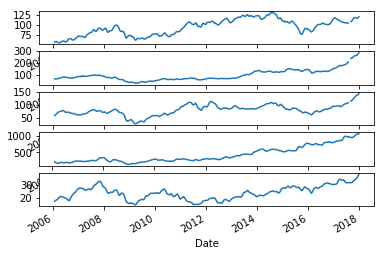

In [162]:
#CVX, BA, CAT, GOOGL and CSCO

figure = plt.figure

plt.subplot(5,1,1)
CVX["Date"] = pd.to_datetime(CVX["Date"])
CVX.set_index("Date", inplace = True)
CVX["Open"].rolling(window = 25).mean().plot()
CVX = CVX.reset_index()

plt.subplot(5,1,2)
BA["Date"] = pd.to_datetime(BA["Date"])
BA.set_index("Date", inplace = True)
BA["Open"].rolling(window = 25).mean().plot()
BA = BA.reset_index()

plt.subplot(5,1,3)
CAT["Date"] = pd.to_datetime(CAT["Date"])
CAT.set_index("Date", inplace = True)
CAT["Open"].rolling(window = 25).mean().plot()
CAT = CAT.reset_index()

plt.subplot(5,1,4)
GOOGL["Date"] = pd.to_datetime(GOOGL["Date"])
GOOGL.set_index("Date", inplace = True)
GOOGL["Open"].rolling(window = 25).mean().plot()
GOOGL = GOOGL.reset_index()

plt.subplot(5,1,5)
CSCO["Date"] = pd.to_datetime(CSCO["Date"])
CSCO.set_index("Date", inplace = True)
CSCO["Open"].rolling(window = 25).mean().plot()
CSCO = CSCO.reset_index()